# SINC-DVR METHOD TO CALCULATE THE ROVIBRATIONAL ENERGIES OF A DIATOMIC MOLECULE #

# Pre-requisite knowledge

**Scientific pre-requisite knowledge**

To complete the notebook below, students should be familiar with the

- time-independent Schrödinger equation and the postulates of quantum mechanics
- Born-Oppenheimer approximation and electronic structure simulations
- different degrees of freedom of a molecule
- harmonic oscillator model and its limitations in modeling vibrational motion
- rigid rotor model in quantum mechanics

For an introduction to or review of the above topics, please see a standard Physical Chemistry text (e.g. sections 4.1 - 4.3, 5.1 - 5.5, 5.8 - 5.9, 9.1, and 13.1 - 13.3 in McQuarrie's [Physical Chemistry: A Molecular Approach](https://mitpress.mit.edu/9781940380216/physical-chemistry/) would serve as a good resource).

**Programming and Python pre-requisite knowledge**

To complete the notebook below, students should know

- basic Python syntax (variable types, variable assignment, formatted printing using f-strings, etc. )
- how to execute a Jupyter notebook

Although interpreting and modifying Python code is not a pre-requisite to use this Jupyter notebook, these skills may be beneficial for a deeper appreciation of the algorithms.

# Introduction

## 1. Derivation of the vibrational Schrödinger equation for a diatomic molecule

To calculate the rovibrational energy of a diatomic molecule $A-B$, we must solve the nuclear Schrödinger equation

\begin{equation}
\left( \hat{T}^{NUC} + V^{BO}(R) \right) \psi^{NUC} = E\psi^{NUC},
\end{equation}

where the Born-Oppenheimer $V^{\rm BO}(R)$ only depends on the bond length ($R$) and is obtained by solving the electronic Schrödinger equation. The nuclear kinetic energy operator can be expressed in terms of the center of mass (COM) and internal coordinates

\begin{equation}
\hat{T}^{NUC} = \hat{T}^{COM} + \hat{T}^{int} = -\frac{\hbar^2}{2 M} \nabla_{COM}^2 - \frac{\hbar^2}{2\mu} \nabla_{int}^2,
\end{equation}
where the total mass of the molecule is $M = m_A + m_B$, the reduced mass is $\mu = \frac{m_Am_B}{m_A+m_B}$,
$\nabla_{int} = \frac{1}{R^2}\frac{\partial}{\partial R} R^2 \frac{\partial}{\partial R} - \frac{\hat{J}^2(\theta,\phi)}{R^2}$,
and the total angular momentum operator $\hat{J}^2(\theta)$ only acts on the angular variables $\theta$ and $\phi$. With this definition, the nuclear Schrödinger equation is

\begin{equation}
\left( -\frac{\hbar^2}{2 M} \nabla_{COM}^2 - \frac{\hbar^2}{2\mu} \frac{1}{R^2}\frac{\partial}{\partial R} R^2 \frac{\partial}{\partial R} + \frac{\hat{J}^2(\theta,\phi) }{2\mu R^2} + V^{BO}(R) \right) \psi^{NUC} = E\psi^{NUC}
\end{equation}

Because the Hamiltonian is separable into the COM coordinates and the internal coordinates $(R,\theta,\phi)$, the solutions are of the form $\psi^{NUC} = \psi^{COM}\psi^{int}$ and $E = E_{TRANS} + E_{int}$. The equation involving the COM coordinates  
\begin{equation}
-\frac{\hbar^2}{2 M} \nabla_{COM}^2 \psi^{COM} = E_{TRANS}\psi^{COM}
\end{equation}
is less interesting as it determines the translational energies of the molecule. The equation involving the internal coordinates is given by

\begin{equation}
\left( - \frac{\hbar^2}{2\mu} \frac{1}{R^2}\frac{\partial}{\partial R} R^2 \frac{\partial}{\partial R} + \frac{\hat{J}^2(\theta,\phi) }{2\mu R^2} + V^{BO}(R) \right) \psi^{int}(R,\theta,\phi) = E_{int}\psi^{int}(R,\theta,\phi)
\end{equation}

and determines the internal energy. The above equation has the same mathematical structure as the Schrödinger equation for the hydrogen atom and the solution of both proceeds in a similar manner. First, because $\hat{J}^2(\theta,\phi)$ does not act on $R$, we define $\psi^{int}(R,\theta,\phi)=\psi^{vib}(R)Y_{J,M_J}(\theta,\phi)$, where the spherical harmonic $Y_{J.M_J}(\theta,\phi)$ is an eigenfunction of $\hat{J}^2(\theta,\phi)$ with eigenvalue $J(J+1)\hbar^2$. Inserting this form of the wave function into the Schrödinger equation yields
an equation that only depends on the variable $R$

\begin{equation}
\left( - \frac{\hbar^2}{2\mu} \frac{1}{R^2}\frac{d}{ dR} R^2 \frac{d}{dR} + \frac{J(J+1)\hbar^2 }{2\mu R^2} + V^{BO}(R) \right) \psi^{vib}(R) = E_{int}\psi^{vib}(R)
\end{equation}

We can simplify the above expression by defining the function $\psi^{vib}(R) = \frac{\chi(R)}{R}$ and inserting it into the above equation to give (after some differentiation)
\begin{equation}
\left( - \frac{\hbar^2}{2\mu} \frac{d^2}{dR^2} + \frac{J(J+1)\hbar^2 }{2\mu R^2} + V^{BO}(R) \right) \chi(R) = E_{int}\chi(R)
\end{equation}

Notice that the last two terms inside the brackets define an effective potential that only depends on the internuclear separation $R$

\begin{equation}
V^{eff}(R) = V^{rot}(R) + V^{BO}(R) = \frac{J(J+1)\hbar^2}{2\mu R^2} + V^{BO}(R)
\end{equation}

while the first term represents the vibrational kinetic energy operator

\begin{equation}
\hat{T}^{vib} = - \frac{\hbar^2}{2\mu} \frac{d^2}{dR^2}.
\end{equation}

Using these definitions, the vibrational Schrödinger equation is

\begin{equation}
\left( \hat{T}^{vib} + V^{eff}(R) \right) \chi(R) = E_{int}\chi(R)
\end{equation}

The eigenvalues $E_{int}$ represent the rovibrational energy levels of a diatomic molecule and the R-dependent part of the vibrational wave function is obtained as $\psi^{vib}(R) = \chi(R)/R$.

## 2. The vibrational Schrödinger equation for a diatomic molecule

**INTRODUCTION**

To calculate the rovibrational energy levels of a diatomic molecule ($A-B$), we want to solve the problem of two nuclei $A$ and $B$ moving in the Born-Oppenheimer potential $V^{BO}(R)$ that only depends on the internuclear separation $R$. For a molecule in a totally symmetric $^{1}\Sigma$ electronic state (no spin or orbital angular momentum), the Hamiltonian is given by

\begin{equation*}
\hat{H} = \hat{T}^{vib} + \hat{V}^{eff}(R),
\tag{2.1}
\end{equation*}

and we want to solve the vibrational Schrödinger equation 

\begin{equation}
\hat{H}\chi_{n,J} = E_{n,J}\chi_{nJ},
\end{equation}
where $n=0,1,...$ and $J=0,1,... $ are the vibrational and rotational quantum numbers, respectively. For the remainder of this discussion, we will use atomic units ($\hbar = m_e = e = a_0 = E_h = 4\pi\epsilon_0 = 1$).

The vibrational kinetic energy operator is

\begin{equation} 
\hat{T}^{\rm vib} = -\frac{1}{2\mu}\frac{d^2}{d R^2},
\end{equation}

where $\mu$ is the reduced reduced mass in atomic units, and the effective potential consists of two terms

\begin{equation}
\hat{V}^{eff}(R) = V^{ BO}(R) + V^{rot} (R)
\end{equation}

The potential energy curve, $V^{BO}(R)$, is obtained by solving the electronic Schrödinger equation and accounts for the kinetic and potential energy (electron-electron repulsion and nucleus-electron attraction) of the electrons as well as the Coulomb repulsion between the nuclei. The second term

\begin{equation}
V^{rot}(R) = \frac{J(J+1)}{\mu R^2}
\end{equation}

describes the contribution of rotational motion to the effective potential.


## 3. Solution of the vibrational Schrödinger equation in the sinc-DVR basis

A particularly useful method for solving the rovibrational Schrödinger equation is the so called sinc discrete variable representation (sinc DVR,for short) method[1]. In this method, the coordinate $R$ is restricted to $R_{min} \leq R \leq R_{max}$ and is discretized on a grid of $N$ uniformly-spaced points 

\begin{equation}
R_i = R_{min} + i\cdot \Delta R \hspace{2cm} \Delta R = \frac{ R_{max} - R_{min} }{N-1} \hspace{2cm} 0 \leq i \leq N-1 \hspace{2mm}.
\end{equation}

With each grid point $i$, there is an associated sinc function $s_i(R)$

\begin{equation}
s_i(R) = \frac{{\rm sin}\left( \frac{\pi(R-R_i)}{\Delta R} \right) }{\frac{\pi(R-R_i)}{\Delta R}}
\end{equation}

The sinc functions have several useful properties; of particular interest are the following two observations: 1) the sinc function is "normalized" in the sense that $s_i(R_i)=1$ and 2) that the value of the sinc function vanishes at all other grid points (i.e. $s_i(R_j) = 0$ for $j\neq i$). Using the sinc functions we can expand $\chi(R) = \sum_{i=0}^{N-1} c_i s_i(R)$  and show that 

\begin{equation}
\chi(R_k) = \sum_{i=0}^{N-1} c_i s_i(R_k) = c_k s_k(R_k) = c_k, 
\end{equation}

where the second equality results from property 2 above, while the last result is obtained by using property 1. In other words, the value of the solution $\chi$ at the grid point $k$ is equal to the value of the expansion coefficient $c_k$.

Since the rovibrational Hamiltonian is the sum of two operators (as in Eq. (2.1)), the Hamiltonian matrix is the sum of two matrices (${\bf H} = {\bf T}^{vib} + {\bf V}^{eff}$) with elements

\begin{equation}
H_{i,j} = T^{vib}_{i,j} + V^{eff}_{i,j} ,
\tag{3.1}
\end{equation}

where $i$ and $j$ represent grid points, $0\leq i \leq N-1$, and $0\leq j \leq N-1$. The sinc DVR method is particularly advantageous because the Hamiltonian matrix elements can be easily calculated without integration. The kinetic energy matrix elements are given by [1]

\begin{equation}
T^{vib}_{i,j} = \begin{cases}
 \frac{1}{2\mu\Delta R^2}\left( \frac{\pi^2}{3} - \frac{1}{2(i+1)^2} \right)\hspace{2.0cm} i = j\\
 \\
 \frac{(-1)^{(i-j)}}{\mu\Delta R^2} \left( \frac{1}{(i-j)^2}-\frac{1}{(i+j+2)^2}\right)\hspace{1cm} i \neq j\\
\end{cases} \tag{3.2}
\end{equation}  

Furthermore, the matrix representation of any operator that only depends on $R$ is diagonal. For example, the matrix elements of the effective potential are given by

\begin{equation}
V_{i,j}^{eff} = \begin{cases}
 V^{BO}(R_i) + \frac{J(J+1)}{2\mu R_i^2} \hspace{2.0cm} i = j\\
 \\
 0\hspace{5.1cm} i \neq j\\
\end{cases} \tag{3.3}
\end{equation} 

Once the Hamiltonian matrix is constructed, solutions to the matrix form of the Schrödinger equation 
\begin{equation} 
{\bf H} {\bf c} = E {\bf c}
\end{equation}
are obtained by diagonalizing the Hamiltonian matrix. Unless $J=0$, the effective potential contains contributions due to rotations (note the $J$-dependence in Eq. (3.3)), and the eigenvalues correspond to energies of rovibrational levels (e.g. the lowest eigenvalue of the Hamiltonian matrix with $J=1$ would correspond to $E_{0,1}$). For a given eigenvalue $E$, the vector ${\bf c}$ contains the expansion coefficients of $\chi_{n,J}(R)$. Because $\psi^{vib}_{n,J}(R) = \frac{\chi_{n,J}(R)}{R}$ and $\chi_{n,J}(R) = \sum_{i=0}^{N-1} c_is_i(R)$, the value of the vibrational wave function at grid point $k$ is given by

\begin{equation}
\psi_{n,J}^{vib}(R_k) = \frac{\chi_{n,J}(R_k)}{R_k} = \frac{c_k}{R_k}.
\end{equation}

As a result, even though the eigenvectors of $\bf H$ are normalized (i.e. $\sum_{k=0}^{N-1} \vert c_k \vert^2 = 1$), $\psi_{n,J}^{vib}(R)$ above is not! To rectify this, we define the normalized vibrational wave function as

\begin{equation}
\psi^{vib}_{n,J}(R_k) = \frac{1}{\sqrt{I_N}}\frac{c_k}{R_k},
\tag{3.4}
\end{equation}
where $I_N$ is the normalization factor. Recalling that the volume element is $R^2{\rm d}R$ and using the rectangle approximation for evaluating the integral, we can show that $I_N = \Delta R$ regardless of which energy level the wave function corresponds to
\begin{equation}
I_N = \int_{R_{min}}^{R_{max}} \left(\psi_{n,J}^{vib}(R)\right)^*\psi_{n,J}^{vib}(R) R^2{\rm d}R = \sum_{k=0}^{N-1} \left(\psi_{n,J}^{vib}(R_k)\right)^*\psi_{n,J}^{vib}(R_k) R_k^2{\rm d}R = \Delta R \sum_{k=0}^{N-1} \left(\frac{c_k}{R_k}\right)^* \frac{c_k}{R_k} R_k^2 {\rm d}R = \Delta R \sum_{k=0}^{N-1} \vert c_k \vert^2 = \Delta R.
\end{equation}

**References**

> [1] D. T. Colbert and W. H. Miller, J. Chem. Phys. **96**, 1982 (1992)

## 4. Relative intensities for rovibrational transitions of a diatomic molecule

Consider the rovibrational transition from an initial level with quantum numbers $(n_i,J_i)$ to a final level with quantum numbers $(n_f,J_f)$. The relative intensity of an absorption line is proportional to the thermal population of the initial level the square of the transition dipole moment and is given by

\begin{equation}
I^{rel}_{n_i \rightarrow n_f, J_i \rightarrow J_f}  = \frac{I_{n_i \rightarrow n_f, J_i \rightarrow J_f}}{I_{max}} \propto \frac{P_{n_i,J_i} \cdot \left( \langle \mu \rangle_{n_i \rightarrow n_f , J_i \rightarrow J_f} \right)^2}{I_{max}} .
\tag{4.1}
\end{equation}

where $I_{max}$ is the intensity of the most intense absorption line.

The thermal population of rovibrational levels is governed by the Boltzmann distribution

\begin{equation}
P_{n,J} = (2J+1)e^{- \left( \frac{\tilde{E}_{n,J}hc}{k_BT} \right) },
\tag{4.2}
\end{equation}

where the speed of light is expressed in cm$\cdot$s$^{-1}$, and $\tilde{E}_{n,J}$ is expressed in wavenumbers.

The transition dipole moment for a rovibrational transition is given by the integral

\begin{equation}
\langle \mu \rangle_{n_i \rightarrow n_f, J_i \rightarrow J_f} = \int_{0}^{\infty} \left(\psi^{vib}_{n_f,J_f}(R) \right)^*\cdot \mu_{{\rm el}}(R)\cdot \psi^{vib}_{n_i,J_i}(R) R^2{\rm d}R,
\end{equation}

where $\mu_{\rm el}(R)$ is the electronic dipole moment as a function of the internuclear separation $R$, and $\psi_{J_i,n_i}(R)$ and $\psi_{J_f,n_f}(R)$ are the $normalized$ solutions to the vibrational Schrödinger equation. Using the rectangular approximation for the integral the above integral and the result of Eq. (5), the transition dipole moment is given by

\begin{equation}
\langle \mu \rangle_{n_i \rightarrow n_f, J_i \rightarrow J_f} = \sum_{k=0}^{N-1} c_{k; n_f,J_f} \cdot \mu_{\rm el} (R_k) \cdot c_{k;n_i,J_i} ,
\tag{4.3}
\end{equation}

where $\mu_{\rm el}(R_k)$ is the value of the electronic dipole moment at grid point $k$, $c_{k;n_f,J_f}$ is the $k^{\rm th}$ element of the eigenvector for the final level with eigenvalue $E_{n_f,J_f}$, and $c_{k;n_i,J_i}$ is the $k^{\rm th}$ element of the eigenvector for the initial level with eigenvalue $E_{n_i,J_i}$. Note that if the functional form of the electronic dipole moment is not known, we can approximate it by its Taylor series expansion about $R_e$ as $\mu_{\rm el}(R) = \mu_{\rm el}(R_e) + \mu^\prime_{\rm el}(R_e) ( R - R_e ) + ...$, where $\mu^\prime_{\rm el}$ is the derivative of the electronic dipole moment at the equiolibrium bond length $R_e$. Using the fact that the $\{ \psi^{vib}_{n,J}(R)\}$ are orthogonal, the transition dipole moment is given by

\begin{equation}
\langle \mu \rangle_{n_i \rightarrow n_f, J_i \rightarrow J_f} = \mu^\prime_{\rm el}(R_e) \sum_{k=0}^{N-1} c_{k; n_f,J_f} \cdot (R - R_e) \cdot c_{k;n_i,J_i} .
\tag{4.4}
\end{equation}
Note that if only relative intensities are to be computed, the value of $\mu^\prime_{\rm el}(R_e)$ is not required (see Eq. 4.1).

# Overview of the code and description of parameters

## Overview of the code

To simulate the IR spectrum of a diatomic, the Python code below calculates and saves the energies $E_{n,J}$ and vibrational wave functions $\psi_{n,J}(R)$ by solving the vibrational Schrödinger equation in the sinc-DVR basis for all those states with $0 \leq n \leq n_{max}$ and $0\leq J \leq J_{max}$. Here $n_{max}$ and $J_{max}$ denote the maximum value of the vibrational and rotational quantum numbers, respectively. To accomplish this the code performs the steps outlined in the diagram below. For more details, please see [section 3](#3.-solution-of-the-vibrational-schrödinger=equation-in-the-sinc-dvr-basis). After computing the rovibrational energy levels, the line positions and relative intensities in the $P$ and $R$  branches of the fundamental ($n_i=0 \rightarrow n_f = 1$) and first overtone ($n_i=0 \rightarrow n_f = 2$) vibrational transitions are calculated as described in [section 4](#4.-relative-intensities-for-rovibrational-transitions-of-a-diatomic-molecule). 

<img src="https://github.com/act-cms/lesson-04-diatomic-molecule-ir-spectrum-analysis/blob/main/sinc-DVR-workflow-diagram.jpg?raw=true" style="display: block; margin: 0 auto; max-height:600px;">

The section below describes the input parameters for the calculation. If you are interested in the specific implementaiton of each task, please see the Python functions in the code.

## Description of input parameters and output description

__INPUT PARAMETERS__

 - **PES_fname_** (string, default: 'hcl-PES'):

File name of the input file that contains the Born-Oppenheimer potential curve for the molecule. Currently, only '.txt' and '.csv' file extensions are supported. The first column in the file should contain the internuclear separation in units of ${\mathring{\rm{A}}}$ and the second column contains the value of the Born-Oppenhheimer potential un Hartree. If the file name does not include the path, this file must reside in the same directory/folder as the Jupyter notebook. To read the file from a different directory than this Jupyter notebook, include the path in the file name.

- **save_spectra_** (integer, default: 1):

Flag to specify whether or not the line positions in the fundamental and fisrt overtone spectra are save. Set to **1** means to save the spectra and set to **0** if you do not want to save the spectra. 

- **fund_fname_** (string, default: 'fundamental-lines.txt'):

File name of the output file to save the line positions for the fundamental spectrum. The output is a human-readable '.txt' file; the first column contains the variable $m$ and the second column contains the line position in cm$^{-1}$. For the $P$ branch the variable $m=-J$, where $J$ is the rotational quantum number of the initial level. For the $R$ branch, $m=J+1$, where $J$ is the rotational quantum number of the initial level. If the file name does not include the path, the file will be saved in the same directory/folder as the Jupyter notebook. To save in a different directory than this Jupyter notebook, include the path in the file name. 

- **over_fname_** (string, default: 'overtone-lines.txt'):

File name of the output file to save the line positions for the first overtone spectrum. The output is a human-readable '.txt' file; the first column contains the variable $m$ and the second column contains the line position in cm$^{-1}$. For the $P$ branch the variable $m=-J$, where $J$ is the rotational quantum number of the initial level. For the $R$ branch, $m=J+1$, where $J$ is the rotational quantum number of the initial level. If the file name does not include the path, the file will be saved in the same directory/folder as the Jupyter notebook. To save in a different directory than this Jupyter notebook, include the path in the file name.

- **m1_**: (float, default: 1.00783)

Molar mass of one of the atoms in the diatomic molecule in units of g$\cdot$mol$^{-1}$.

- **m2_**: (float, default: )

Molar mass of other atom in the diatomic molecule in units of g$\cdot$mol$^{-1}$.

- **N_**: (integer, default: 200)

Number of DVR grid points to use in the calculation. The number of grid points should be equal to or greater than the number of internuclear separations at which the Born-Oppenheimer potential is evaluated. Although more grid points generally better reults, the computational cost of the diagonalization increases as the third power of the grid points, so larger values can lead to significantly longer calculations. The default of 200 is reasonable.

- **R_min_**: (float, default: 0.5)

Shortest intenuclear separation on the DVR grid in ${\mathring{\rm{A}}}$. This value should not be smaller than the smallest internuclear separation at which the Born-Oppenheimer potential is evaluated.

- **R_max_**: (float, default: 2.0)

Largest intenuclear separation on the DVR grid in ${\mathring{\rm{A}}}$. This value should not be greater than the largest internuclear separation at which the Born-Oppenheimer potential is evaluated.

- **J_max_**: (integer, default: 10)

Maximum rotational quantum number for which the energies $E_{n,J}$ are saved. The value should not be smaller than 1. The deafault is 10. 

- **n_max_**: (integer, default: 5)

Maximum vibrational quantum number for which the energies $E_{n,J}$ are saved. The value should not be smaller than 2. Thee default is 5.

- **T_**: (float, default: 298.15)

Temperature of sample in K.

- **peak_broadening_factor_**: (float, default: 1.0)

Determines the line width in th simulated spectra. The line shape of each transition is assumed to be Lorentzian and this value determines the full width at half maximum of each peak.

- **plot_potential_fit_**: (integer, default: 1)

Flag to specify whether or not to plot the fitted potential. If set to **1** the input potential and the potential on the grid are plotted; this may be good to trouble shoot cases when the results appear erroneous. Setting the variable to **0** skips plotting.

- **plot_spectrum_**: (integer, default: 1)

Flag to specify whether or not to plot the simulated fundamental and first overtone spectra. Setting the variable to **1** will result in the spectra being plotted while **0** will skip plotting.

# <span style="color:green"> Input variables </span>

In [1]:
# input file name with potential data

PES_fname_              = 'hcl-ccpVTZ-RHF-pes.txt'                             # name of input file that contains the Born-Oppenheimer potential curve

# output file name with line positions in the fundmental and first overtone spectrum

save_spectra_           = 0                                         # 1 = save spectra ; 0 = do not save spectra
fund_fname_             = 'dvr-fundamental-lines.txt'                         # name of output file to save spectral line positions for fundamental
over_fname_             = 'dvr-overtone-lines.txt'                            # name of output file to save spectral lines for first overtone

# parameters related to the diatomic molecule

m1_                     = 1.00783                                   # mass of atom 1 (g/mol) for hydrogen
m2_                     = 34.96885                                  # mass of atom 2 (g/mol)

# parameters related to the size of the Hamiltonian and spline interpolation

N_                      = 200                                       # number of DVR points to use
R_min_                  = 0.50                                      # smallest internuclear separation for fitted potential (Angstrom)
R_max_                  = 2.0                                       # lasrgest internuclear separation for fitted potential (Angstrom)

# parameters related to what energy levels to calculate and simulation of rovibrational spectrum

J_max_                  = 10                                        # maximum value of the rotational quantum number (levels 0 <= J <= J_max are calculated & stored)
n_max_                  = 5                                         # maximum value for the vibrational quantum number (levels 0 <= n <= n_max are calculated & stored)
T_                      = 298.15                                    # temperature of sample to use when evaluating relative intensities (K)
peak_broadening_factor_ = 1.0                                       # line broadening factor (cm**-1)

# parameters related to plotting

plot_potential_fit_     = 1                                         # 0 - do not plot the potential / 1 - plot potential
plot_spectrum_          = 1                                         # 0 - do not plot IR psectrum / 1 - plot IR spectrum 

# <span style="color:red"> Python code (take a look if you are interested in what is under the hood, but change the code at your own risk)

## Load libraries

In [2]:
import csv
import os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import scipy.constants as spconst

## Function definitions

The function below reads in the Born-Oppenheimer potential from a file. It is assumed that the first column in the file contains values of the internuclear separation $R$, the second column contains the electronic energy (electronic + nuclear repulsion). If available, the thrid column contains the values of the dipole moment. 

Upon return, the potential is shifted such that ${\rm min}\left[ V(R) \right] = 0.0$. 

In [3]:
def read_potential(f_name):

    '''
    function mu_given , R_read , V_read , mu_read = read_potential(f_name) reads in the potential
    
    INPUT:
        f_name:    name of input file (extension must be either '.txt' or '.csv' 
    OUTPUT:
        mu_given:  integer, 1 = dipole data given in data file, 0 = dipole data was not given in data file (hence the dipole array is populated with values of R, the internuclear separation 
        R_read[]:  float array, stores the radii
        V_read[]:  float array, stores shifted the energies such that min(V_read) = 0
        mu_read[]: float array, stores molecular dipole
    '''

    mu_given = 0
    R_read   = []
    V_read   = []
    mu_read  = []

    # check to see if file exists
    if ( os.path.exists( f_name ) == False ):

        print(f'!!!! ERROR !!!! --- the file {f_name:s} does not exist')

        return mu_given, R_read , V_read , mu_read

    # determine file type ('.txt' or .csv')
    file_root, file_extension = os.path.splitext(f_name)    

    # the file is a text file
    if ( file_extension == '.txt'):

        with open(f_name) as f:
        
            line = f.readline()
            
            while (line):

                row = line.split()
            
                R_read.append(float(row[0]))
                V_read.append(float(row[1]))

                if ( len( row ) == 3 ):
                    mu_given = 1
                    mu_read.append( float( row[2] ) )
                else:
                    mu_read.append( float( row[0]) )

                line = f.readline()
     
    # the file is a csv file
    elif ( file_extension == '.csv' ):
    
        with open(f_name, 'r') as csvfile:

            csv_reader = csv.reader(csvfile)

            for row in csv_reader:
                
                R_read.append(float(row[0]))
                V_read.append(float(row[1]))

                if ( len( row ) == 3 ):
                    mu_given = 1
                    mu_read.append( float( row[2] ) )
                else:
                    mu_read.append( float( row[0] ) )

    else:

        # unknown file type
        print(f'!!!! ERROR !!!! --- the file extension {file_extension:s} is not supported')

    V_read -= np.min(V_read)
    
    return mu_given,R_read,V_read,mu_read

Fucntion to convert units from atomic units to other units or the reverse. 

In [4]:
def convert_units(number,conversion):

    '''    
    function number = convert_units(values,conversion) converts units
    
    INPUT:
        number               : float, value(s) to be converted
        conversion           : str, direction of conversion 
        SUPPORTED CONVERSIONS: 'au2ang', 'ang2au','au2m','m2au','au2kcalPmol',kcalPmol2au','au2invcm','invcm2au','au2J','J2au')
    OUTPUT:
        number               : float, converted value(s)
    '''

    fac = -1.0

    au2ang       = spconst.physical_constants['Bohr radius'][0]*1e10
    au2kcalPmol  = spconst.physical_constants['hartree-joule relationship'][0]*spconst.N_A*1e-3/4.184 
    au2invcm     = spconst.physical_constants['hartree-inverse meter relationship'][0]*1e-2 
    au2J         = spconst.physical_constants['hartree-joule relationship'][0] 
    au2gPmol     = 1e3 * ( spconst.N_A * spconst.m_e )

    if ( conversion == 'au2ang'      ): fac = au2ang
    if ( conversion == 'ang2au'      ): fac = 1.0 / au2ang
    if ( conversion == 'au2m'        ): fac = au2ang * 1e-10
    if ( conversion == 'm2au'        ): fac = 1.0 / au2ang * 1e10
    if ( conversion == 'au2kcalPmol' ): fac = au2kcalPmol
    if ( conversion == 'kcalPmol2au' ): fac = 1.0 / au2kcalPmol
    if ( conversion == 'au2invcm'    ): fac = au2invcm
    if ( conversion == 'invcm2au'    ): fac = 1.0 / au2invcm
    if ( conversion == 'au2J'        ): fac = au2J
    if ( conversion == 'J2au'        ): fac = 1/au2J
    if ( conversion == 'au2gPmol'    ): fac = au2gPmol
    if ( conversion == 'gPmol2au'    ): fac = 1.0 / au2gPmol

    if ( fac < 0.0 ):
        print(F'Unknown conversion direction {conversion} ... conversion not performed')

    else:

        number *= fac

    return number


Function to convert units for an array.

In [5]:
def convert_values(values,conversion):

    '''
    
    function values = convert_distance(values,conversion) converts units
    
    INPUT:
        values[]             : float array, value(s) to be converted
        conversion           : str, direction of conversion 
        SUPPORTED CONVERSIONS: 'au2ang', 'ang2au','au2m','m2au','au2kcalPmol',kcalPmol2au','au2invcm','invcm2au','au2J','J2au')
    OUTPUT:
        values[]             : float, converted value(s)
    '''

    for i in range ( len(values) ):
        values[i] = convert_units(values[i], conversion)
            
    return values

Function to calculate the reduced mass

In [6]:
def compute_mu(m1, m2):

    '''
    function mu = compute_mu(m1,m2) calculates the reduced mass mu = m1 * m2 /  ( m1 + m2 )
    
    INPUT:
        m1: float, mass 1
        m2: float, mass 2
    OUTPUT:
        mu: float, reduced mass
    '''

    return  m1 * m2 / ( m1 + m2 )

Function to interpolate the potential using cubic splines. Upon return, ${\rm min}\left[ V_{interpolated}(R) \right] = 0$.

In [7]:
def spline_potential( R_in , V_in , R_min , R_max , N , plot_fit):

    ''' 
    function R_out,V_out = psline_potential(R_in,V_in,R_min,R_max,N,R_out,V_out) computes the cubic spline interpolation of the input potential

    INPUT:
        R_in[]:   float array, internuclear distance values
        V_in[]:   float array, potential energy values OR electronic dipole moment values
        R_min:    float, smallest internuclear distance 
        R_max:    float, largest internuclear distance
        N:        integer, number of interpolated values
        plot_fit: integer, 1 = plot fit, 0 = do not plot firt 
    OUTPUT:
        R_out[]: float array, internuclear distances for fitted potential
        V_out[]: float array, potential energy (or electronic dipole) values for interpolated potential (shifted so that min(V_fit) = 0
    '''

    if ( R_in[0] > R_min ):

        print(F'!!! WARNING !!! ... Cubic spline with R_min_in = {R_in[0]:5.2f} > R_min_out = {R_min:5.2f} is not a good idea ... CHECK THE SPLINE FIT')

    if ( R_in[len(R_in) -1 ] < R_max ):

        print(F'!!! WARNING !!! ... Cubic spline with R_min_in = {R_in[len(R_in)-1]:5.2f} < R_max_out = {R_max:5.2f} is not a good idea ... CHECK THE SPLINE FIT')
    
    
    spline_function = sp.interpolate.CubicSpline(R_in,V_in,bc_type='natural')

    R_out = []
    V_out = []

    dR = ( R_max - R_min ) / float( N - 1 ) 
    
    R_val = R_min
    
    for i in range(N):
    
        R_out.append(R_val)

        R_val += dR
    
    V_out = spline_function(R_out)

    V_out -= np.min(V_out)

    if ( plot_fit == 1):
        
        plt.plot(R_in , V_in , 'r+' , R_out , V_out , 'b-' )
        plt.legend(['Born-Oppenheimer','cubic spline interpolation'])
        plt.xlabel('R / au ')
        plt.ylabel('V(R) / au')
        plt.ylim([ 0.0 , V_out[N - 1] + 0.1] )
        plt.xlim( R_out[0] , R_out[N - 1] )
        
    return R_out,V_out
        

Function to shift values of $R$ to $R-R_e$

In [8]:
def calculate_mu_expansion( V , R ):

    # number of grid points
    N = len( V)

    # initialize electronic dipol array
    mu = np.zeros( N , dtype = float )
    
    # find approximate R_e on our grid

    # initialize Re value
    Re = 0.0
    
    # loop over grid points
    for i in range( 1 , N ):

        if ( V[ i ]  < V[ i - 1 ] ): Re = R[ i ]

    # shift dipole data to R-Re
    for i in range( N ):
        
        mu[i] = R[i] - Re

    return mu

Function to calculate the "core" Hamiltonian (i.e., the portion of the Hamiltonian that is independent of the rotational quantum number $J$) that is comprised of the kinteic energy and the contribution from the Born-Oppenheimer potential (only contributes to diagonal elements). 

In [9]:
def compute_H_core(mu,R_fit,V_fit,H_core):

    ''' 
    function H_core = compute_H_core(mu,R_fit,V_fit,H_core) computes the core matrix (unchanged throughout the process) according to

    H_core[i,j] = T[i,j] + V_BO[i,j] * delta[i,j]

    the B.O. potential only adds to the diagonals

    INPUT:
        mu:         float, reduced mass
        R_fit{}:    float array, internuclear distances for fitted potential
        V_fit[]:    float array, fitted potential energy curve
    OUTPUT:
        H_core[][]: float matrix, core matrix that contains the kinetics energy and rotationaless B.O. potential
    '''

    dR = R_fit[1] - R_fit[0]
    
    F    = 1.0 / ( 2.0 * mu * dR**2 )
    D_F  = np.pi**2 / 3.0 * F          # factor to multiply diagonal elements by
    OD_F = 2.0 * F                     # factor to multiply off-diagonal elements by
    
    for i in range( len(R_fit) ):

        for j in range(i):

            H_core[i,j] = OD_F * (-1)**(i-j) * ( 1.0 / float(i - j)**2 - 1.0 / float(i + j + 2)**2 )
            H_core[j,i] = H_core[i,j]

        H_core[i,i] = D_F - F / ( 2.0 * float(i + 1)**2 ) + V_fit[i]
    
    return H_core

Function to compute the full Hamiltonian for a given rotational quantum number $J$ by combining the core Hamiltonian and the rotational potential $V^{ROT}(R) = \frac{J(J+1)}{2 \mu R^2}$.

In [10]:
def add_rotational_contribution(H_core,R_fit,J,mu,H):

    '''
    function H = add_rotational_contribution(H_core,R_fit,J,mu,H) computes the Hamiltonian according to
    
        H[i,j] = H_core[i,j] + H_rot[i,j] * delta[i,j]

    where the diagonal rotational potential is given by
    
        H_rot[i,i] = J*(J+1) / ( 2 * mu * R**2 )
        
    INPUT:
        H_Core[][]: float array, core matrix that contains the kinetics energy and rotationaless B.O. potential
        R_fit[]:    float array, internuclear distances
        J:          integer, rotational quantum number
        mu:         float, reduced mass
    OUTPUT:
        H[][]:      float matrix, Hamiltonian matrix including kinetic energy matrix, B.O. potential, and rotational potential
    '''

    rot_fac = float( J * ( J + 1 ) ) / ( 2.0 * mu )
    
    for i in range( len( R_fit_ ) ):

        for j in range( i ):

            H[i,j] = H_core[i,j]
            H[j,i] = H[i,j]

        H[i,i] = H_core[i,i] + rot_fac / ( R_fit[i]**2 )

    return H


Function to diagonalize the Hamiltonian 

In [11]:
def get_rovib_energies( H , E_rovib, C_rovib ):

    '''
    function E_rovib, C_rovib = get_rovib_energies( H , E_rovib, C_rovib )

    calculates the rovibrational energies (E_rovib) and corresponding eigenevectors (C_rovib) by diagonalziing the Hamiltonian 
    on entry, the Hamiltonian is assumed to be in atomic units
    on return, the eigenvalues and corresponding eigenvectors are sorted in ascending order, and eigenvalues are returned in wavenumbers

    INPUT:
        H[][]:        float array, stores Hamiltonian
    OUTPUT:
        E_rovib[]:    float array, rovibrational energies in ascending order.
        C_rovib[][]:  float matrix, eigenvectors corresponding to eigenvalues 
    '''

    # get some dimensions
    N      = len(H[0])      # dimension of the Hamiltonian
    n_save = len(E_rovib)   # number of vibrational states to save

    # allocate arryas for diagonalization
    eig_vals = np.zeros( N , dtype = float )
    eig_vecs = np.zeros( ( N , N ), dtype = float )

    # diagonalize 
    eig_vals , eig_vecs = sp.linalg.eigh( H )

    # save n lowest-energy eigenvectors
    for n in range( n_save):

        E_rovib[ n ] = eig_vals[ n ]
        C_rovib[ n , : ] = eig_vecs[ : , n ]
    
    # convert eigenvalues to wave numbers
    E_rovib = convert_values(E_rovib , 'au2invcm')
    
    return E_rovib, C_rovib
    

Function to calculate the value of the vibrational wave function at ALL grid point values $R_i$ according to Eq. (3.4)

In [12]:
def compute_normalized_WF(eigvec,R_fit):

    '''
    function WF = compute_normalized_WF(C,R) calculates the value of the normalized wave function at each grid point in R

    input:
        eigvec: float array, eigenvector of rovibrational hamiltonian
        R:      float array. grid points
    output:
        WF:     float array, value of normalized wave function at grid points
    '''

    # get number of grid points/expansion coefficients
    N = len(eigvec)

    # calculate grid point spacing
    Delta_R = R_fit[1] - R_fit[0]

    # initialize wave function values
    WF = np.zeros(N, dtype = float)

    # loop over grid points
    for n in range(N):

        # value of the wave function at this grid point
        WF[n] = eigvec[n] / R_fit[n] 

    # normalize the wave function
    WF /= np.sqrt(Delta_R) 

    return WF

Function to calculate the line positions, assuming that the molecule is in the ground vibrational state. Thus, for the R branch, the line positions are $\tilde{\nu}_R(J,n) = \tilde{E}(J+1,n) - \tilde{E}(J+1,0)$, and $\tilde{\nu}_P(J,n) = \tilde{E}(J-1,n) - \tilde{E}(J+1,0)$. $n$ denotes the vibrational quantum number for the final states, with $n=1$ for the fundamental transition, and $n=2$ corresponds to the first overtone.

In [13]:
def get_line_positions( energies , n_max , J_max ):

    ''' 
    function P_branch,R_branch = get_line_positions(energies, n_max, J_max) calculates the line positions in the P (dJ = -1) and R (dJ = +1) branches 
             assuming that the molecule is initially in the ground vibrational state with n=0 

    input:
        energies[][]: float array with energies of rovibrational levels
        n_max:        maximum number of vibrational states for which energies were saved (int)
        J_max:        maximum number of rotational levels for which energies were saved (int)
    output:
        P_branch[]:   float array with line positions in the P branch
        R_branch[]:   float array with line positions in the P branch
    '''
    
    P_branch = np.zeros( ( J_max + 1 , n_max + 1) , dtype = float )
    R_branch = np.zeros( ( J_max + 1 , n_max + 1) , dtype = float )
    
    for n_f in range( 1 , n_max + 1 ):

        for J_i in range( J_max ):
        
            R_branch[ J_i , n_f ] = energies[ J_i + 1 , n_f ] - energies[ J_i , 0 ]

        for J_i in range( 1 , J_max + 1 ): 

            P_branch[ J_i , n_f ] = energies[ J_i - 1 , n_f ] - energies[ J_i , 0 ]

    return P_branch , R_branch

Calculate thermal populations of rovibrational levels. The thermal population is given by Eq. (4.2)

In [14]:
def get_thermal_populations( energies , n_max, J_max , T):

    ''' 
    function P_thermal = get_thermal_populations(energies, n_max, J_max, T) calculates the thermal populations of the rovibrational
             energy levels with quantum numbers (n,J), taking into account degeneracy and the Boltzmann factor.

    input:
        energies[][]:  float array with energies of rovibrational levels
        n_max:         maximum number of vibrational states for which energies were saved (int)
        J_max:         maximum number of rotational levels for which energies were saved (int)
        T:             temerpature of sample (K)
    output:
        P_thermal[][]: float array with thermal populations of levels
    '''

    # initialize thermal population array
    P_thermal = np.zeros( ( J_max + 1 , n_max + 1 ), dtype=float )
    
    # thermal energy in cm**-1
    E_thermal_invcm = sp.constants.k * T / ( sp.constants.Planck * sp.constants.speed_of_light * 1.0e2 )

    # maximum absolute (unnormalized) thermal population
    max_P_thermal = - 1.0

    # loop over vibrational states
    for n in range ( n_max_ + 1 ):

        # loop over rotational levels
        for J in range ( J_max_ + 1 ):

            # calculate thermal population
            P_thermal[ J , n ] = float( 2*J + 1 ) * np.exp( - energies[ J , n ] / E_thermal_invcm ) 

            # check to see if we need to update the maximum population value
            if ( max_P_thermal < P_thermal[ J , n ] ): max_P_thermal = P_thermal[ J , n ]

    # scale the thermal populations
    P_thermal = P_thermal/max_P_thermal

    return P_thermal

Function to calculate the transition dipole moment $\langle \mu \rangle_{n_i \rightarrow n_f, J_i \rightarrow J_f}$ according to Eq. (4.3)

In [15]:
def transition_dipole_integral(C_f,C_i,mu):

    # initialize transition dipole value
    tr_dipole = 0.0

    # loop over grid points
    for n in range( len(mu) ):

        # update transition dipole value
        tr_dipole += C_f[n] * mu[n] * C_i[n]

    return tr_dipole

Function to calculate the transition dipoles for the P- and R-brach lines.

In [16]:
def get_transition_dipoles( WF , mu_fit , n_max , J_max ):

    '''
        function P_branch , R_branch = get_transition_dipoles( WF , mu_fit , n_max , J_max ) calculates the transition dipoles for the 
            P and R branches. See Eqs. (4.3) and (4.4)

        input:
            WF[][][]     : float array normalized wave functions for the rovibrational levels
            mu_fit[]     : electronic dipole moment evaluated at the grid points
            n_max        : maximum number of vibrational states saved
            J_max        : maximum number of rotational levels saved
        output:
            P_branch[][] : transition dipole moments for the P branch
            R_branch[][] : transition dipole moments for the R branch
    '''
    

    # initialize transition dipole arrays
    R_branch = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
    P_branch = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )

    # loop over final vibrational states
    for n_f in range( 1 , n_max + 1):

        # loop over initial rotational levels in the R branch
        for J_i in range( J_max ):

            # calculate transition dipole moment for this R-branch trnasition
            R_branch[ J_i , n_f ] = transition_dipole_integral( WF[ J_i + 1 , n_f , : ] , WF[ J_i , 0 , : ] , mu_fit )        

        # loop over initial rotational levels in the P branch
        for J_i in range( 1 , J_max_ + 1 ): 

            # calculate transition dipole moment for this P-branch trnasition
            P_branch[ J_i , n_f ] = transition_dipole_integral( WF[ J_i - 1 , n_f , : ] , WF[ J_i , 0 , : ] , mu_fit )

    return P_branch , R_branch

Function to calculate the relative transition intensities accroding to Eq. (4.1)

In [17]:
def get_relative_intensities( P_thermal , P_dip , R_dip , n_max , J_max ):

    '''
        function P_rel_int , R_rel_int = get_relative_intensities( P_thermal , P_dip , R_dip , n_max , J_max )
                 calculates the relative intensities for transitions in the P and R branches such that the relative intensity for
                 the most probable transitiion is 1. See Eq. (4.1)
        
        input:
            P_thermal[][]: float array with the thermal populations of the rovibational energy levels (J , n)
            P_dip[][]    : float array with transition dipole moments in the P branch
            R_dip[][]    : float array with transition dipole moments in the R branch
            n_max        : maximum number of vibrational states saved
            J_max        : maximum number of rotational levels saved
        output:
            P_rel_int[][]: relative intensities for transitions in the P branch
            R_rel_int[][]: relative intensities for transitions in the R branch
    '''
    
    # initialize relative intensity arrays
    R_rel_int    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
    P_rel_int    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )

    # initialize maximum intensity value
    I_max = 0.0

    # find maxmimum intensity
    
    # loop over final vibrational states
    for n_f in range( 1 , n_max + 1 ):

        # loop over initial rotational levels in the R brnach
        for J_i in range( J_max ):

            # evaluate absolute intensity
            I = P_thermal[ J_i , 0 ] * R_dip[ J_i , n_f ]**2

            # check to see if this is larger than the max intensity
            if ( I > I_max ): I_max = I

        # loop over initial rotational levels in the P branch
        for J_i in range( 1 , J_max + 1 ): 

            # calculate relative intensity
            I = P_thermal[ J_i , 0 ] * P_dip[ J_i , n_f ]**2

            # check to see if this is larger than the max intensity
            if ( I > I_max ): I_max = I

    # calculate relative intensities

    # loop over final vibrational states
    for n_f in range( 1 , n_max + 1 ):

        # loop over initial rotational levels in the R branch
        for J_i in range( J_max ):

            # calculate relative intensity
            R_rel_int[ J_i , n_f ] = ( P_thermal[ J_i , 0 ] * R_dip[ J_i , n_f ]**2 ) / I_max

        # loop over initial rotational levels in the P branch
        for J_i in range( 1 , J_max + 1 ): 

            # calculate relative intensity
            P_rel_int[ J_i , n_f ] = ( P_thermal[ J_i , 0 ] * P_dip[ J_i , n_f ]**2 ) / I_max

    return P_rel_int , R_rel_int

Function to calculate the simulated IR spectrum. The intensity $I$ at $\nu$ is given by

\begin{equation}
I_{total}(\nu) = \sum_k I_k(\nu),
\end{equation}

where the contribution of each possible rovibrational transition $k$ is given by

\begin{equation}
I_k(\nu) =\frac{1}{1 + \left( \frac{\nu -\nu_0}{w/2}\right)^2}
\end{equation}

Note that the code currently can only handle the spectrum associated with each vibrational transition separately.

In [18]:
def get_spectrum_intensity_value(nu , w , R_branch_pos , P_branch_pos , R_branch_int , P_branch_int ):

    '''
        function spectrum_Value = get_spectrum_intenity_value( nu , w , R_branch_pos , P_brnach_pos , R_branch_int , P_branch_int )
                 calculates the simulated IR spectrum assuming each a Lorentzian line shape function. 
        
        input:
            nu              : energies (cm**-1) where to evaluate the absorption value
            w               : full width at half maximum (cm**-1)
            P_branch_pos[]  : float array with line positions in the P branch
            R_branch_pos[]  : float array with line positions in the R branch
            P_branch_int[]  : float array with transition intensities in the P branch
            R_branch_pos[]  : float array with transition intensities in the R branch           
        output:
            spectrum_value[][]: absorption values
    '''

    
    spectrum_value = 0.0

    J_max = len(R_branch_pos)
    
    for J_i in range(J_max):

        denom = 1.0 + 4.0 * ( ( nu - R_branch_pos[J_i] ) / w )**2
        
        spectrum_value += R_branch_int[J_i] / denom 

    for J_i in range(1,J_max):

        denom = 1.0 + 4.0 * ( ( nu - P_branch_pos[J_i] ) / w )**2
        
        spectrum_value += P_branch_int[J_i] / denom
    
    return spectrum_value

Function to save the spectrum of the molecule. The function is set up such that it prints the information to a text file and introduces the variable $m$ for each rovibrational transition such that $m=-J$ for transitions in the $P$ branch, $m=J+1$ for transition in the $R$ branch, anbd $J$ denotes the quantum number of the initial rotational level. This substitution allows the analysis of the $P$ and $R$ branches all at once. 

In [19]:
def save_spectrum( fname , J_max , P_branch_pos , R_branch_pos ):

    '''
        function save_spectrum( fname , J_max_ , P_branch_pos , R_branch_pos ) saves the line positions and corresponding m values, 
            where m=-J for P-branch lines, m=J+1 for R-branch lines, and J denotes the initial rotational quantum number
            
        input:
            fname          : name of the file where the data is saved
            J_max          : maximum number of rotational levels saved
            P_branch_pos[] : array with line positions (cm**-1) in the P branch
            R_branch_pos[] : array with line positions (cm**-1) in the R branch
        output:
            none
    '''
    
    file = open( fname , 'w')

    for J_i in range(J_max , 0, -1):
        
        file.write(f'{-J_i:4d} {P_branch_pos[J_i]:16.8f}\n')

    for J_i in range(0 , J_max ):
        
        file.write(f'{J_i+1:4d} {R_branch_pos[J_i]:16.8f}\n')
    
    file.close()

    return

## Read in Born-Oppenheimer potential data

Read in potential data

In [20]:
# read in potential data

mu_given_,R_in_,V_in_, mu_in_ = read_potential(PES_fname_)

## Initialize arrays and matrices that are used by main program

Initialize arrays needed for the code

In [21]:
# Arrays for interpolated/fitted potential
V_fit_          = np.zeros( N_ , dtype = float )
R_fit_          = np.zeros( N_ , dtype = float )
mu_fit_         = np.zeros( N_ , dtype = float )

# Matrices for the Hamiltonian
H_core          = np.zeros( ( N_ , N_ ), dtype = float ) 
H               = np.zeros( ( N_ , N_ ), dtype = float )

#arrays/matrices to store eigenvector/eigenvalue information
C_rovib         = np.zeros( ( J_max_ + 1 , n_max_ + 1 , N_ ), dtype = float )  # store rovibrational eigenvectors 
E_rovib         = np.zeros( ( J_max_ + 1 , n_max_ + 1 ), dtype=float )         # store rovibrational energies
WF_rovib        = np.zeros( ( J_max_ + 1 , n_max_ + 1 , N_ ), dtype = float )  # store rovibrational wave functions

#matrices to store R/P-branch line positions, transition dipole moments, relative line intensities, and thermal poulations of ro-vibrational energy levels
R_branch_pos    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
P_branch_pos    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
R_branch_dip    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
P_branch_dip    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
R_branch_int    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
P_branch_int    = np.zeros( ( J_max_ + 1 , n_max_ + 1) , dtype = float )
P_thermal_rovib = np.zeros( ( J_max_ + 1 , n_max_ + 1 ), dtype=float )

## Convert input parameter values to atomic units

Convert input values to atomic units. Here, we assume that the user specified isotope masses in units of g/mol and that internuclear separations are specified in units of Angstrom.

In [22]:
R_in_  = convert_values( R_in_  , 'ang2au' )
m1_    = convert_units( m1_  , 'gPmol2au' )
m2_    = convert_units( m2_  , 'gPmol2au' )
R_min_ = convert_units( R_min_ , 'ang2au' )
R_max_ = convert_units( R_max_ , 'ang2au' )

## Some preliminary setup work (get reduced mass, calculate fitted potential, fitted dipole function) 

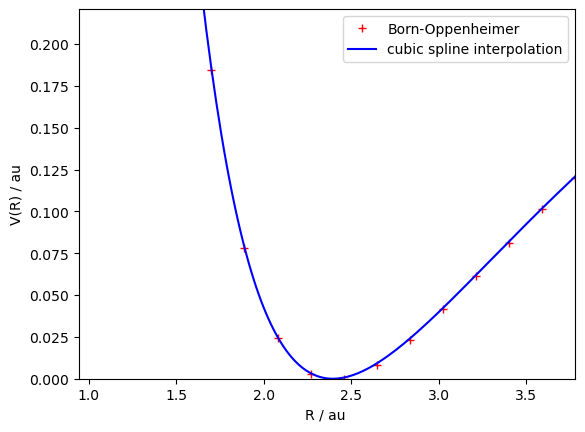

In [23]:
# calculate reduced mass

mu_ = compute_mu( m1_ , m2_ )

# calculate spline fit for the potential

R_fit_,V_fit_ = spline_potential(R_in_,V_in_,R_min_,R_max_,N_,plot_potential_fit_)

# calculate spline fit for the electronic dipole moment

if ( len(mu_in_) != 0 ): R_fit_,mu_fit_ = spline_potential(R_in_,mu_in_,R_min_,R_max_,N_,0)

# if we use the expansion of the dipole moment, we need to shift the values stored in mu_fit since these are just values of R and we need R-Re

if ( mu_given_ == 0 ): mu_fit_ = calculate_mu_expansion( V_fit_ , R_fit_ )         

## Calculate the **core** Hamiltonian: H_core[i,j] = T[i,j] + V_BO[i,i] 

This is where you would implement the relevant loops (and calling any relevant functions) to add the kinetic energy contributiuon to the Hamiltonian matrix 

In [24]:
# calculate the core Hamiltonian (this is independent of J, so we only need to calculate once at the beginning)

H_core = compute_H_core(mu_,R_fit_,V_fit_,H_core)

## Update the Hamiltonian matrix by adding the potential energy contributions and diagonalize to determine the rovibrational energies

Gven that the core Hamiltonian does not change, we can calculate the rovibrational energies by adding in the rotational contributions for each value of the rotational quantum number $J$ and diagonalizing the resulting Hamiltonian. The pseudocode for this is:

```python

loop over possible J values

    compute H = H_core + V_ROT(J) for this J

    diagonalize H to obtain energies and wave functions for this J

```

Thus, the $n^{\rm th}$ eigenvalue of the Hamiltonian corresponds to the energy of the state with quantum numbers $(n , J)$.

In [25]:
for J in range(J_max_ + 1):

    # add in rotational contribution
    
    H = add_rotational_contribution(H_core,R_fit_,J,mu_,H)

    # diagonalize Hamiltonian to compute rovibrational energies and eigenvectors

    E_rovib[J,:], C_rovib[J,:,:] = get_rovib_energies( H , E_rovib[J,:], C_rovib[J,:,:] )

    # calculate normalized wave functions

    for n in range(n_max_ + 1):
        
        WF_rovib[J,n,:] = compute_normalized_WF(C_rovib[J,n,:],R_fit_)

## Given the rovibrational energies, determine the R/P-branch lines and thermal populations of rovibrational levels

In [26]:
# Calculate P/R-branch transition line positions

P_branch_pos , R_branch_pos = get_line_positions( E_rovib , n_max_ , J_max_ )

# Calculate thermal populations of rovibrational energy levels and normalize so that max value is 1.0

P_thermal_rovib = get_thermal_populations( E_rovib , n_max_ , J_max_ , T_)

## Given the vibrational wave functions and $R$-dependence of the dipole moment, calculate the transition dipole moments and the normalized transition intensities

In [27]:
# Calculate dipole transition moments

P_branch_dip , R_branch_dip = get_transition_dipoles( C_rovib , mu_fit_ , n_max_ , J_max_ )

# Calculate relative intensities taking into account thermal populations and transition dipole moments

P_branch_int , R_branch_int = get_relative_intensities( P_thermal_rovib , P_branch_dip , R_branch_dip , n_max_ , J_max_ )

## Save line positions for fundamental and 1$^{\rm\bf st}$ overtone

Print results to text file. By definition, $m=-J_i$ for lines in the P branch and $m=J_i+1$ for lines in the R-branch

In [28]:
if ( save_spectra_ == 1):
    
    # save the fundamental spectrum
    save_spectrum( fund_fname_ , J_max_ , P_branch_pos[:,1] , R_branch_pos[:,1] )

    # save the first overtone spectrum
    save_spectrum( over_fname_ , J_max_ , P_branch_pos[:,2] , R_branch_pos[:,2] )

# Summary results

## Print key results

In [29]:
print("P branch lines and relative intensities")
print("")
print(F'         FUNDAMENTAL           1ST OVERTONE')
print(F'J_i  dE(cm**-1)   I_rel     dE(cm**-1)   I_rel')
for J_i in range(J_max_ , 0, -1):
    print(F'{J_i:3d}   {P_branch_pos[J_i,1]:8.4f}  {P_branch_int[J_i,1]:6.4f}      {P_branch_pos[J_i,2]:8.4f}  {P_branch_int[J_i,2]:6.4f}' )

print("")

print("R branch lines and relative intensities")
print("")
print(F'         FUNDAMENTAL           1ST OVERTONE')
print(F'J_i  dE(cm**-1)   I_rel     dE(cm**-1)   I_rel')
for J_i in range(0,J_max_):
    print(F'{J_i:3d}   {R_branch_pos[J_i,1]:8.4f}  {R_branch_int[J_i,1]:6.4f}      {R_branch_pos[J_i,2]:8.4f}  {R_branch_int[J_i,2]:6.4f}' )


P branch lines and relative intensities

         FUNDAMENTAL           1ST OVERTONE
J_i  dE(cm**-1)   I_rel     dE(cm**-1)   I_rel
 10   2812.1865  0.0210      5743.8136  0.0001
  9   2837.6660  0.0522      5774.0349  0.0004
  8   2862.7159  0.1159      5803.3043  0.0008
  7   2887.3231  0.2298      5831.6072  0.0017
  6   2911.4747  0.4049      5858.9291  0.0030
  5   2935.1579  0.6298      5885.2561  0.0048
  4   2958.3600  0.8563      5910.5744  0.0067
  3   2981.0683  1.0000      5934.8706  0.0081
  2   3003.2705  0.9690      5958.1317  0.0080
  1   3024.9543  0.7124      5980.3451  0.0060

R branch lines and relative intensities

         FUNDAMENTAL           1ST OVERTONE
J_i  dE(cm**-1)   I_rel     dE(cm**-1)   I_rel
  0   3066.7186  0.2627      6021.5799  0.0023
  1   3086.7756  0.7113      6040.5779  0.0065
  2   3106.2672  0.9665      6058.4816  0.0090
  3   3125.1820  0.9964      6075.2801  0.0095
  4   3143.5091  0.8522      6090.9635  0.0083
  5   3161.2377  0.6261      6

## Plot the fundamental and 1$^{\rm \bf st}$ overtone spectra

In [30]:
N_plot_IR      = 2000

# calculate fundamental spectrum

nu_min_fund    = P_branch_pos[ J_max_ , 1 ] + 10
nu_max_fund    = R_branch_pos[ J_max_ - 1 , 1 ] + 10
d_nu_fund      = ( nu_max_fund - nu_min_fund ) / float( N_plot_IR - 1 )

IR_nu_fund     = np.zeros( N_plot_IR, dtype = float )
IR_int_fund    = np.zeros( N_plot_IR, dtype = float ) 
I_rel_max_fund = -9.0e9

for n in range( N_plot_IR ):

    IR_nu_fund[ n ]  = n * d_nu_fund + nu_min_fund 
    IR_int_fund[ n ] = get_spectrum_intensity_value(IR_nu_fund[ n ] , peak_broadening_factor_ ,
                       R_branch_pos[ : , 1 ] , P_branch_pos[ : , 1 ] , R_branch_int[ : , 1 ] , P_branch_int[ : , 1 ] )

    if ( IR_int_fund[ n ] > I_rel_max_fund ): I_rel_max_fund = IR_int_fund[ n ] 

# calculate 1st overtone spectrum

nu_min_over    = P_branch_pos[ J_max_ , 2 ] + 10
nu_max_over    = R_branch_pos[ J_max_ - 1 , 2 ] + 10
d_nu_over      = ( nu_max_over - nu_min_over ) / float( N_plot_IR - 1 )

IR_nu_over     = np.zeros( N_plot_IR, dtype = float )
IR_int_over    = np.zeros( N_plot_IR, dtype = float ) 
I_rel_max_over = -9.0e9

for n in range( N_plot_IR ):

    IR_nu_over[ n ]  = n * d_nu_over + nu_min_over 
    IR_int_over[ n ] = get_spectrum_intensity_value(IR_nu_over[ n ] , peak_broadening_factor_,
                       R_branch_pos[ : , 2 ] , P_branch_pos[ : , 2 ] , R_branch_int[ : , 2 ] , P_branch_int[ : , 2 ] )

    if ( IR_int_over[ n ] > I_rel_max_over ): I_rel_max_over = IR_int_over[ n ] 


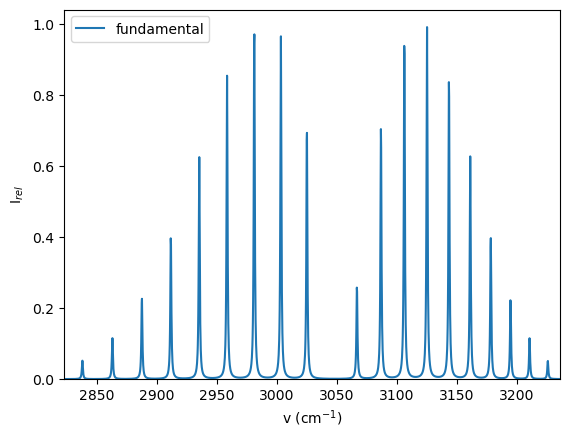

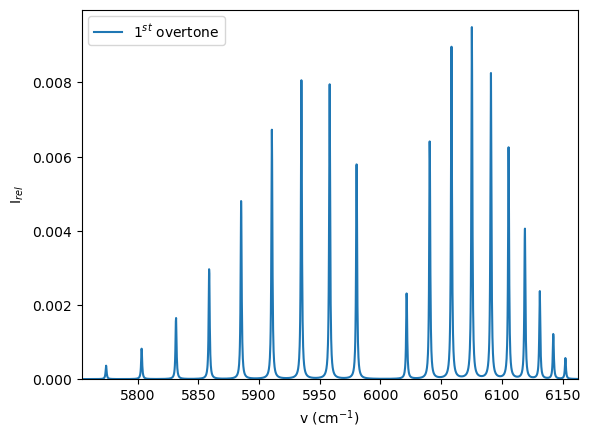

In [31]:
if ( plot_spectrum_ == 1 ):

    # fundamental
    
    plt.xlim( nu_min_fund , nu_max_fund )
    plt.ylim( 0.0 , I_rel_max_fund * 1.05 )
    plt.xlabel( 'v (cm$^{-1}$)' )
    plt.ylabel( 'I$_{rel}$' )
    plt.plot( IR_nu_fund , IR_int_fund )
    plt.legend( ['fundamental'], loc='upper left' )
    plt.show()

    # 1st overtone
    
    plt.xlim( nu_min_over , nu_max_over )
    plt.ylim( 0.0 , I_rel_max_over * 1.05 )
    plt.xlabel( 'v (cm$^{-1}$)' )
    plt.ylabel( 'I$_{rel}$' )
    plt.plot( IR_nu_over , IR_int_over )
    plt.legend( ['1$^{st}$ overtone'], loc='upper left' )
    plt.show()

## Plot first few vibrational functions

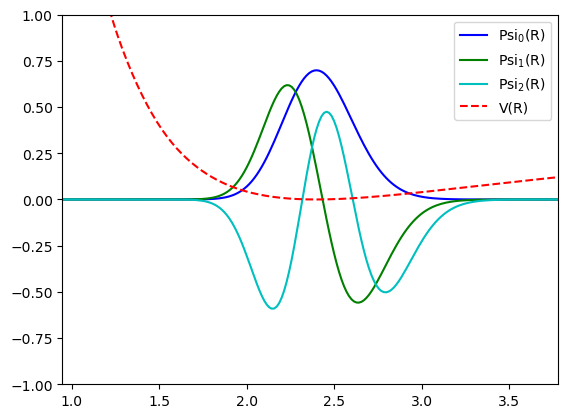

In [32]:
plt.xlim( R_min_ , R_max_ )
plt.ylim( -1 , 1 )
plt.plot(R_fit_ , WF_rovib[ 0 , 0 ] , 'b-' , R_fit_ , WF_rovib[ 0 , 1 ] , 'g-' , 
         R_fit_ , WF_rovib[ 0 , 2 ] , 'c-' , R_fit_ , V_fit_ , 'r--' )

plt.legend(['Psi$_0$(R)','Psi$_1$(R)','Psi$_2$(R)','V(R)'])
plt.show()